# Binary Classifications Embeddings Model (AboutText)

Embeddings model to predict binary positve/negative metacritic score using AboutText column

In [299]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objs as plotly  # for interactive plots

# Loading and Cleaning Data

In [300]:
df_raw = pd.read_csv('games-features.csv')

In [301]:
df_raw.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,AchievementHighlightedCount,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial,PriceFinal,SupportEmail,SupportURL,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,ExtUserAcctNotice,HeaderImage,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,0,1,68991,1,13,13033334,92789,9140731,78136,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,9.99,9.99,,http://steamcommunity.com/app/10,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,http://cdn.akamai.steamstatic.com/steam/apps/1...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,0,1,2439,1,5,5399140,60368,753627,22699,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,http://cdn.akamai.steamstatic.com/steam/apps/2...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,0,1,2319,1,5,7621102,71499,1709740,34145,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,http://cdn.akamai.steamstatic.com/steam/apps/3...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,0,1,888,1,4,7498965,70936,789676,23235,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,http://cdn.akamai.steamstatic.com/steam/apps/4...,,,English French German Italian Spanish,None,

### Selecting rows and columns used for analysis

In [4]:
df_raw.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [5]:
df_all = df_raw[['QueryName', 'Metacritic',
         #Genre variables
        'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
         'GenreIsCasual','GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
         #Category variables
        'CategorySinglePlayer','CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport',
         #Platform variables
        'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec',
         #Additional Info
        'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
        'MovieCount', 'PackageCount', 'RecommendationCount', 
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance','SteamSpyPlayersEstimate', 
         'SteamSpyPlayersVariance','AchievementCount', 'ControllerSupport', 'FreeVerAvail', 
         'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal',
         #Variables that need transformation
         'ReleaseDate', 'SupportedLanguages', 
         #Text variables
         'Reviews','DetailedDescrip','AboutText']]

In [6]:
df = df_all[df_all['Metacritic']>0]

### Dropping Duplicates

In [7]:
df = df.drop_duplicates()

In [8]:
df_vc = pd.DataFrame(df['QueryName'].value_counts())
df_vc[df_vc['QueryName']>1]

,QueryName
Sid Meier's Civilization IV: Colonization,2
Monday Night Combat,2
Fallout: New Vegas,2
Darksiders,2
Alpha Protocol,2
Sid Meier's Civilization V,2
Sid Meier's Civilization IV: Beyond the Sword,2
Sid Meier's Civilization IV: Warlords,2
Arma 2,2
Sid Meier's Civilization IV,2


In [9]:
#drop Sid Meier's Civilization IV: Colonization dup 
df=df.drop(965)
#drop Fallout: New Vegas dup
df=df.drop(952)
#drop Sid Meier's Civilization V dup
df=df.drop(1205)
#drop Darksiders dup
df=df.drop(1210)
#drop Sid Meier's Civilization IV dup
df=df.drop(962)
#Drop Monday night combat dup
df=df.drop(1278)
#Drop Sid Meier's Civilization IV: Beyond the Sword dup
df=df.drop(964)
#Drop Sid Meier's Civilization IV: Warlords dup
df=df.drop(963)
#Drop Arma 2 dup
df=df.drop(782)
#Drop Alpha Protocol dup
df=df.drop(961)

### Cleaning Languages

In [10]:
import re
pd.set_option('display.max_rows', None)
languages = df['SupportedLanguages'].tolist()

#Split to check all languages
split_lst = []
for language in languages:
    split_lang = re.split('\* |\*|\s|\*\*', language)
    for lang in split_lang:
        split_lst.append(lang)

split_series = pd.Series(split_lst)
split_df = pd.DataFrame(split_series.value_counts())
#split_df[split_df[0]>0]
#lang_list= split_df.index.values.tolist()
#print(lang_list)

In [11]:
#Create list of all possible languages
language_list=['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']

In [12]:
#Create boolean columns for each language
for language in language_list:
    df[language]=df['SupportedLanguages'].str.contains(language)

In [13]:
#create boolean column for audio support (will delete later, using this as reference to check regex)
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==True, 'audio_support?'] = 1
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==False, 'audio_support?'] = 0

In [14]:
#Create transformed language columns without "languages with full audio support" statement
df['transformed']= df['SupportedLanguages'].str.extract("(.+?)\*languages with full audio support")

In [15]:
#Count * in transformed column to count number of languages with audio support
df['num_lang_audio_support']=df['transformed'].str.count('\*')
df['num_lang_audio_support'] = df['num_lang_audio_support'].fillna(0)

In [16]:
pd.set_option('display.max_columns', None)
df.head(100)

,QueryName,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,SupportedLanguages,Reviews,DetailedDescrip,AboutText,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,audio_support?,transformed,num_lang_audio_support
0,Counter-Strike,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,Nov 1 2000,English French German Italian Spanish Simplifi...,,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
2,Day of Defeat,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,May 1 2003,English French German Italian Spanish,,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
6,Half-Life,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,Nov 8 1998,English French German Italian Spanish Simplifi...,,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
7,Counter-Strike: Condition Zero,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,Mar 1 2004,English French German Italian Spanish Simplifi...,,With its extensive Tour of Duty campaign a nea...,With its extensive Tour of Duty campaign a nea...,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
9,Half-Life: Blue Shift,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,Jun 1 2001,English French German,,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,True,True,True,False,False,False,False,False,False,Fa

In [17]:
#Convert bool to numeric and sum
df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']] = df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].replace({True: 1, False: 0})

df['num_languages']=df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].sum(axis=1)

In [18]:
#Drop columns used in transformations
df=df.drop("transformed", axis=1)
df=df.drop("audio_support?", axis=1)

In [19]:
pd.set_option('display.max_columns', None)
df.head(100)

,QueryName,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,SupportedLanguages,Reviews,DetailedDescrip,AboutText,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
0,Counter-Strike,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,Nov 1 2000,English French German Italian Spanish Simplifi...,,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
2,Day of Defeat,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,May 1 2003,English French German Italian Spanish,,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5
6,Half-Life,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,Nov 8 1998,English French German Italian Spanish Simplifi...,,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
7,Counter-Strike: Condition Zero,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,Mar 1 2004,English French German Italian Spanish Simplifi...,,With its extensive Tour of Duty campaign a nea...,With its extensive Tour of Duty campaign a nea...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
9,Half-Life: Blue Shift,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,Jun 1 2001,English French German,,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3
10,Half-Life 2,96,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,0,1,1,1,2,2,35792,9,9901173,81234,5695963,61979,33,False,False,True,False,9.99,Nov 16 2004,English* French* German* Italian* Korean* Span...,,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1,1,1,1,1,1,1,1,0,0

### Cleaning Dates

In [20]:
#Check for dates with inaccurate format
df['ReleaseDate'][df['ReleaseDate'].str.fullmatch('[a-zA-Z]{3}\s\d*?\s\d{4}')==False]

305                Feb 2011
529                        
572                        
668                Jun 2009
687                Jul 2010
904                Sep 2009
1008                       
1180               Mar 2010
1199                       
1228               Apr 2010
1253               Jul 2010
1268               Oct 2010
1269               Oct 2010
1578                       
1856                       
1922                       
1993                       
2171                       
2183                       
2201                       
2214                       
2317               Aug 2013
3805               Nov 2014
4103               May 2015
4943               Jun 2015
12068    December 20th 2016
Name: ReleaseDate, dtype: object

In [21]:
#Convert these dates to accurate format, replace blanks with NAs
df['ReleaseDate']= df['ReleaseDate'].replace({'Oct 2010': 'Oct 1 2010', 'Jul 2010':'Jul 1 2010', 'Aug 2013': 'Aug 2013',
                          'Jun 2015': 'Jun 1 2015', 'December 20th 2016': 'Dec 20 2016',
                          'May 2015': 'May 1 2015', 'Nov 2014': 'Nov 1 2014', 'Sep 2009':'Sep 1 2009',
                          'Jun 2009': 'Jun 1 2009', 'Feb 2011':'Feb 1 2011', 'Mar 2010':'Mar 1 2010',
                          'Apr 2010': 'Apr 1 2010', 'Aug 2013': 'Aug 1 2013'})
df['ReleaseDate'] = df['ReleaseDate'].replace(r'^\s*$', np.nan, regex=True)

In [22]:
#Convert to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [23]:
#check data type
df['ReleaseDate'].dtype

dtype('<M8[ns]')

In [24]:
df.describe()

,Metacritic,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,PriceFinal,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.00000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,72.008501,2.508277,0.186577,1.087696,1.502013,1.798210,1.680984,4.552546e+03,11.968680,5.867512e+05,13742.305145,4.127886e+05,10733.005369,26.519911,14.024385,1.0,0.607159,0.587472,0.532886,0.474273,0.351678,0.234004,0.161074,0.153020,0.085906,0.078747,0.076510,0.069799,0.05906,0.187919,0.051007,0.044743,0.036242,0.032215,0.029083,0.027740,0.015660,0.013870,0.008949,0.008949,0.008949,0.008501,0.000447,1.216555,4.945861
std,11.152135,5.984335,0.391950,0.362037,5.995998,1.829089,1.023349,3.541729e+04,7.336697,2.455699e+06,14185.781091,2.313979e+06,12541.438116,53.770134,10.488378,0.0,0.488491,0.492399,0.499029,0.499449,0.477601,0.423470,0.367681,0.360087,0.280288,0.269404,0.265872,0.254864,0.23579,0.390735,0.220061,0.206785,0.186933,0.176610,0.168076,0.164265,0.124184,0.116979,0.094194,0.094194,0.094194,0.091829,0.021152,2.172011,4.165792
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,66.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.370000e+02,8.000000,3.560100e+04,4938.000000,1.721800e+04,3434.000000,0.000000,8.365000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,73.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.180000e+02,10.000000,1.303870e+05,9449.000000,6.725600e+04,6787.000000,15.000000,9.990000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,80.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.118500e+03,14.000000,4.602110e+05,17745.000000,2.679480e+05,13543.500000,39.000000,19.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
max,96.000000,18.000000,2.000000,5.000000,169.000000,20.000000,11.000000,1.427633e+06,114.000000,9.068758e+07,215972.000000,9.068758e+07,215972.000000,1448.000000,99.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

## Final Cleaning

In [25]:
#Create game_age variable
now = pd.to_datetime('now')
df['Game_Age']=(now - df['ReleaseDate']).dt.total_seconds() / (60*60*24*365.25)

#make columns for month, drop date column
#df_lr['Year'] = df_lr['ReleaseDate'].dt.year 
df['Month'] = df['ReleaseDate'].dt.month_name()
df=df.drop('ReleaseDate', axis=1)

#Make dummy variables for months
df = pd.concat([df, pd.get_dummies(df['Month'])], axis=1)
df = df.drop('Month', axis=1)

#Make booleans numeric
df=df.replace({True: 1, False: 0})

#shuffle rows
df_shuffled= df.sample(frac=1, random_state=1).reset_index()
df_shuffled.shape

/var/folders/z4/dn_6f5qs1cq2pv3rhcbft8w40000gn/T/ipykernel_30729/3443521371.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


(2235, 97)

# Creating Metacritic Binary Variable

(array([  0.,   0.,   5.,  18.,  67., 209., 517., 814., 536.,  69.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

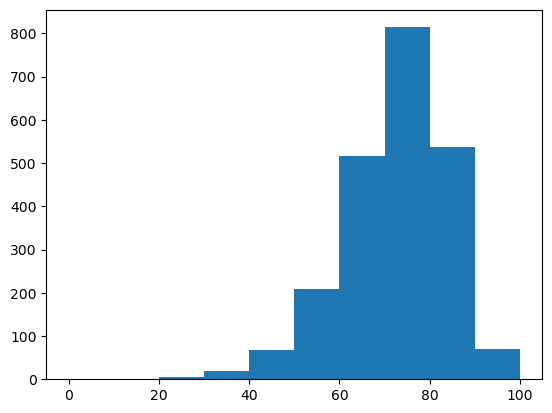

In [26]:
#create histogram of metacritic scores
plt.hist(df['Metacritic'], bins=[0,10,20,30,40,50,60,70,80,90,100])

In [27]:
#create positive, negative, and neutral scores. Will drop neutral later
conditions = [(df['Metacritic']<=60),
              (df['Metacritic']>60)&(df['Metacritic']<80),
              (df['Metacritic']>=80)
             ]
choices = [0, -1, 1]
df['Metacritic_binary'] = np.select(conditions, choices, default=-1)

(array([1312.,    0.,    0.,    0.,    0.,  318.,    0.,    0.,    0.,
         605.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

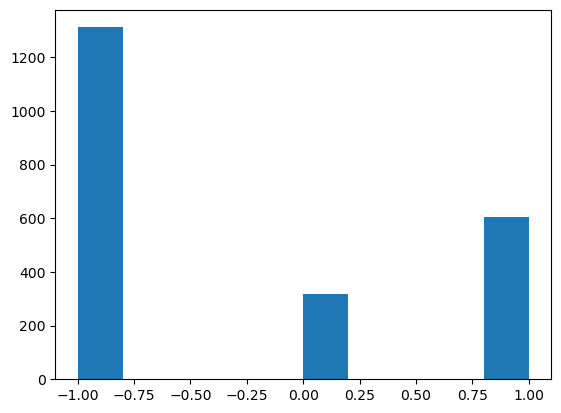

In [28]:
#check for clas imbalance between 0s and 1s (will drop -1)
plt.hist(df['Metacritic_binary'])

# Embeddings Model

In [29]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout
import tensorflow_datasets as tfds

# shap
import shap

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
!pip install wordcloud
import re
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


random.seed(2)
%matplotlib inline

2023-04-06 18:35:42.763612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/amandamurray/opt/anaconda3/envs/w207_final/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [31]:
# define function for token encoder
def encode(text_tensor, label):
    text = text_tensor.numpy()[0]
    encoded_text = encoder.encode(text)
    return encoded_text, label

#  wrap the encode function to a TF Operator
def encode_map_fn(text, label):
    return tf.py_function(encode, inp=[text, label], 
                          Tout=(tf.int64, tf.int64))

In [32]:
#create embeddings data, drop neutral
df_emb = df[['Metacritic_binary', 'Reviews']]
df_emb = df_emb[df_emb['Metacritic_binary']>=0]
blank_val= df_emb['Reviews'].to_list()[0]
df_emb=df_emb[df_emb['Reviews']!=blank_val]
df_emb.shape

(365, 2)

In [33]:
df_emb['Reviews'] = df_emb['Reviews'].apply(preprocessor)

### create tensorflow dataset

In [34]:
# define target
target = df_emb.pop('Metacritic_binary') # .pop removes sentiment col from df

# target and review combined tensors
data_tf = tf.data.Dataset.from_tensor_slices(
    (df_emb[['Reviews']].values, target.values)
)

In [35]:
# inspection of the first 5 examples
for example in data_tf.take(5):
    # print review (first 40 characters) and sentiment (label)
    tf.print(example[0].numpy()[0][:40], example[1])
    #why do they all start with a 'b'? - Varun

b' ro is also one of the markets most uniq' 1
b'alpha prime demanded something more of m' 0
b'funny endless ridiculously good value pc' 1
b'roboblitz scores high on ignign com has ' 1
b'highest rated rts of all timegameranking' 1


In [36]:
# set random seed
tf.random.set_seed(1)

# define splits for training, validation, test
splits=[0.6, 0.2, 0.2] 

# shuffle data
data_tf = data_tf.shuffle(
    df_emb.shape[0], reshuffle_each_iteration=False)

data_tf_test = data_tf.take(int(df_emb.shape[0]*splits[2]))
data_tf_train_valid = data_tf.skip(int(df_emb.shape[0]*splits[2]))
data_tf_train = data_tf_train_valid.take(int(df_emb.shape[0]*splits[0]))
data_tf_valid = data_tf_train_valid.skip(int(df_emb.shape[0]*splits[0]))

### Tokens

In [37]:
# try and except the TF tokenizer
try:
    tokenizer = tfds.features.text.Tokenizer()
except AttributeError:
    tokenizer = tfds.deprecated.text.Tokenizer()

# create an instance of the Counter class
token_counts = Counter()

for example in data_tf_train:
    tokens = tokenizer.tokenize(example[0].numpy()[0])
    token_counts.update(tokens)
    
print('Size of training vocabulary:', len(token_counts))

Size of training vocabulary: 3605


In [38]:
# create an instance of the TF encoder class
try:
    encoder = tfds.features.text.TokenTextEncoder(token_counts) # token_counts contains our training vocabulary
except AttributeError:
    encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)

# try an example first (first 12 characters from the second review in training data)
example_str = 'My son took generic for about 6 months.  his his dr actually prescribed prescribed'
encoder.encode(example_str) # the encode method transforms the text into integers

[3606, 1560, 3421, 3606, 71, 85, 1796, 3606, 1776, 1776, 3606, 267, 3606, 3606]

In [39]:
# the encode_map_fn is defined at the top of the notebook
data_tf_train = data_tf_train.map(encode_map_fn)
data_tf_valid = data_tf_valid.map(encode_map_fn)
data_tf_test = data_tf_test.map(encode_map_fn)

In [40]:
# print first two examples in training data
for example in data_tf_train.take(2):
    print ('----------------------------')
    print('Sequence length:', example[0].shape)
    print('Integer sequence:\n', example[0].numpy())


----------------------------
Sequence length: (80,)
Integer sequence:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 21 30 31 17 32 33 34 35 36 37 38 39 40 41 42 43 44 45 21
 46 47 48 49 50 51 20 52 53 54 55 56  5  6 57 20 58 59 17 60 61 62 17 63
 64 65 66 49 67 68 11 69]
----------------------------
Sequence length: (94,)
Integer sequence:
 [ 70  71  72  73  74  75  76  75  28  77  78  79  80  81  82  28  83  84
  85  73  74  86  39  87  88  89  71  90  91  92  93  94  95  96  97  98
  49  90  99 100 101 102 103 104 105 106 107 108 109  96 110 111 112 113
 114 100 115 116  89 117 100 118  86  49  20 119 120 100 115  20 121 122
  17 123 124 125  90 126 127  73  74  86  89 128 129  28 130  28 131 100
 115 116 132 133]


In [41]:
# take a small subset from training data and print len of sequence
data_tf_train_subset = data_tf_train.take(8)
for idx, example in enumerate(data_tf_train_subset):
    if idx%3==0:
        print('-------------')
    print('Individual size:', example[0].shape)

-------------
Individual size: (80,)
Individual size: (94,)
Individual size: (43,)
-------------
Individual size: (58,)
Individual size: (48,)
Individual size: (136,)
-------------
Individual size: (18,)
Individual size: (152,)


In [42]:
# define batch size
batch_size = 4

# batching of training, validation and test partitions
train_data = data_tf_train.padded_batch(
    batch_size,
    padded_shapes=([-1],[]))

valid_data = data_tf_valid.padded_batch(
    batch_size,
    padded_shapes=([-1],[]))

test_data = data_tf_test.padded_batch(
    batch_size,
    padded_shapes=([-1],[]))

Average sequence length in training mini-batches: 113


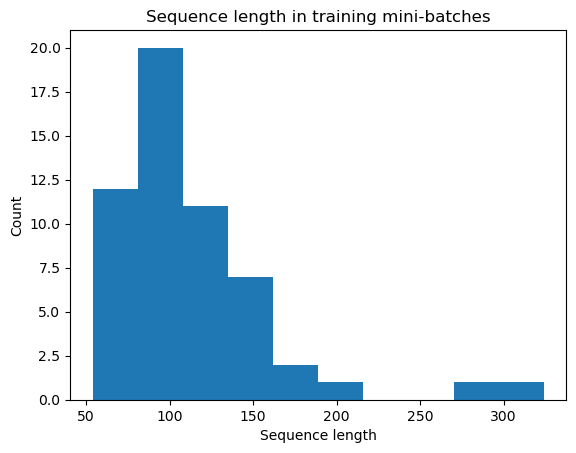

In [43]:
# histogram of sequence length in training mini-batches
seq_len_train = []
for batch in train_data:
    seq_len_train.append(batch[0].shape[1])
    
print('Average sequence length in training mini-batches:',
      int(sum(seq_len_train)/len(seq_len_train))
)

# histogram
plt.hist(seq_len_train)
plt.title('Sequence length in training mini-batches')
plt.ylabel('Count')
plt.xlabel('Sequence length');

In [44]:
# Embed our training vocabulary into 10 dimensions.
vocab_size_train = len(token_counts) + 2
embedding_dim = 20

embedding_layer = tf.keras.layers.Embedding(
    vocab_size_train,
    embedding_dim,
)

## Model

In [264]:
from tensorflow.keras import initializers
vocab_size_train = len(token_counts) + 2
embedding_dim = 3

model = tf.keras.Sequential()
# add embedding layer (this is our imput layer)
# embeddings will be learned during training
# the weights for the embeddings are randomly initialized (just like any other layer!)
model.add(Embedding(
    vocab_size_train,
    embedding_dim,
    embeddings_initializer=initializers.RandomNormal(stddev=0.01),
    #input_length=100, #limits length of sentence to 100 tokens
    name="embedding")
    ),


# average over the emedding dimension, so each review is represented by a 1 vector of size embedding_dimension
model.add(GlobalAveragePooling1D()),

#add Dropout for regularization
model.add(Dropout(0.4))

# add a Dense layer of dimension 16
model.add(Dense(4, activation='tanh')),

#add Dropout for regularization
model.add(Dropout(0.6))

#add a Dense layer of dimension 16
model.add(Dense(16, activation='tanh')),

#add Dropout for regularization
model.add(Dropout(0.5)),

# add last layer (binary classification task)
model.add(Dense(1, activation='sigmoid'))


# save embeddings before training 
embeddings_untrained = model.get_layer('embedding').get_weights()[0]

# print model summary
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 3)           10821     
                                                                 
 global_average_pooling1d_62  (None, 3)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_138 (Dropout)       (None, 3)                 0         
                                                                 
 dense_142 (Dense)           (None, 4)                 16        
                                                                 
 dropout_139 (Dropout)       (None, 4)                 0         
                                                                 
 dense_143 (Dense)           (None, 16)                80        
                                                     

In [265]:
initial_learning_rate = 0.01 ## 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000000, #orginally 100000
    decay_rate=0.9, #originally 0.96
    staircase=True)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer =  tf.keras.optimizers.Adam(learning_rate=lr_schedule), #learning_rate=lr_schedule
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [266]:
# set random seed to get reproducible results
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1)
np.random.seed(1)
history = model.fit(
    train_data, 
    validation_data=valid_data, 
    
    epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 4ms/step - loss: 0.6228 - binary_accuracy: 0.7123 - val_loss: 0.5813 - val_binary_accuracy: 0.7397
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6002 - binary_accuracy: 0.7260 - val_loss: 0.5865 - val_binary_accuracy: 0.7397
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5878 - binary_accuracy: 0.7352 - val_loss: 0.5814 - val_binary_accuracy: 0.7397
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5446 - binary_accuracy: 0.7397 - val_loss: 0.5624 - val_binary_accuracy: 0.7397
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.4643 - binary_accuracy: 0.7854 - val_loss: 0.5300 - val_binary_accuracy: 0.7534
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3958 - binary_accuracy: 0.8128 - val_loss: 0.5252 - val_binary_accuracy: 0.7671
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.36

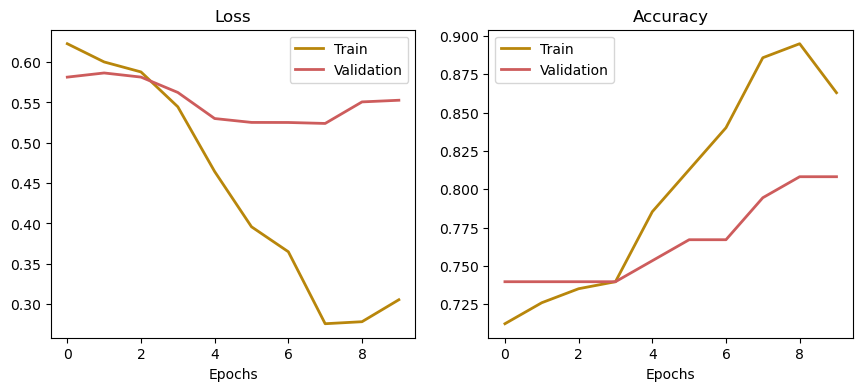

In [267]:
# grab history
history = history.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

In [268]:
def plot_2d_embeddings(embeddings, id_start=1, count=100):
  # Get 1st and 2nd embedding dims for the desired tokens.
  x1 = embeddings[id_start:id_start+count, 0]
  x2 = embeddings[id_start:id_start+count, 1]

  # Plot with the plotly library.
  data = plotly.Scatter(x=x1, y=x2, text=tokens,
                        mode='markers', textposition='bottom left',
                        hoverinfo='text')
  fig = plotly.Figure(data=[data],
                      layout=plotly.Layout(title="Word Embeddings",
                                           hovermode='closest'))
  fig.show()

# Very frequent tokens tend to be more syntactic than semantic, so let's plot
# some rarer words.
plot_2d_embeddings(embeddings, id_start=500, count=500)

In [294]:
# retrieve embeddings after training (weights)
embeddings_trained = model.get_layer('embedding').get_weights()[0]

# remove embedings at index 0 and last index
# these correspond to the additional indeces added for padding (0) and out of vocabulary words (size_train_vocab + 1).
embeddings_trained = embeddings_trained[1:-1]

train_vocab = []
for token in token_counts.keys():
    train_vocab.append(token)
print('Size of trained embeding matrix:', embeddings_trained.shape)
print('Size of training vocabulary:', len(token_counts))

Size of trained embeding matrix: (3605, 3)
Size of training vocabulary: 3605


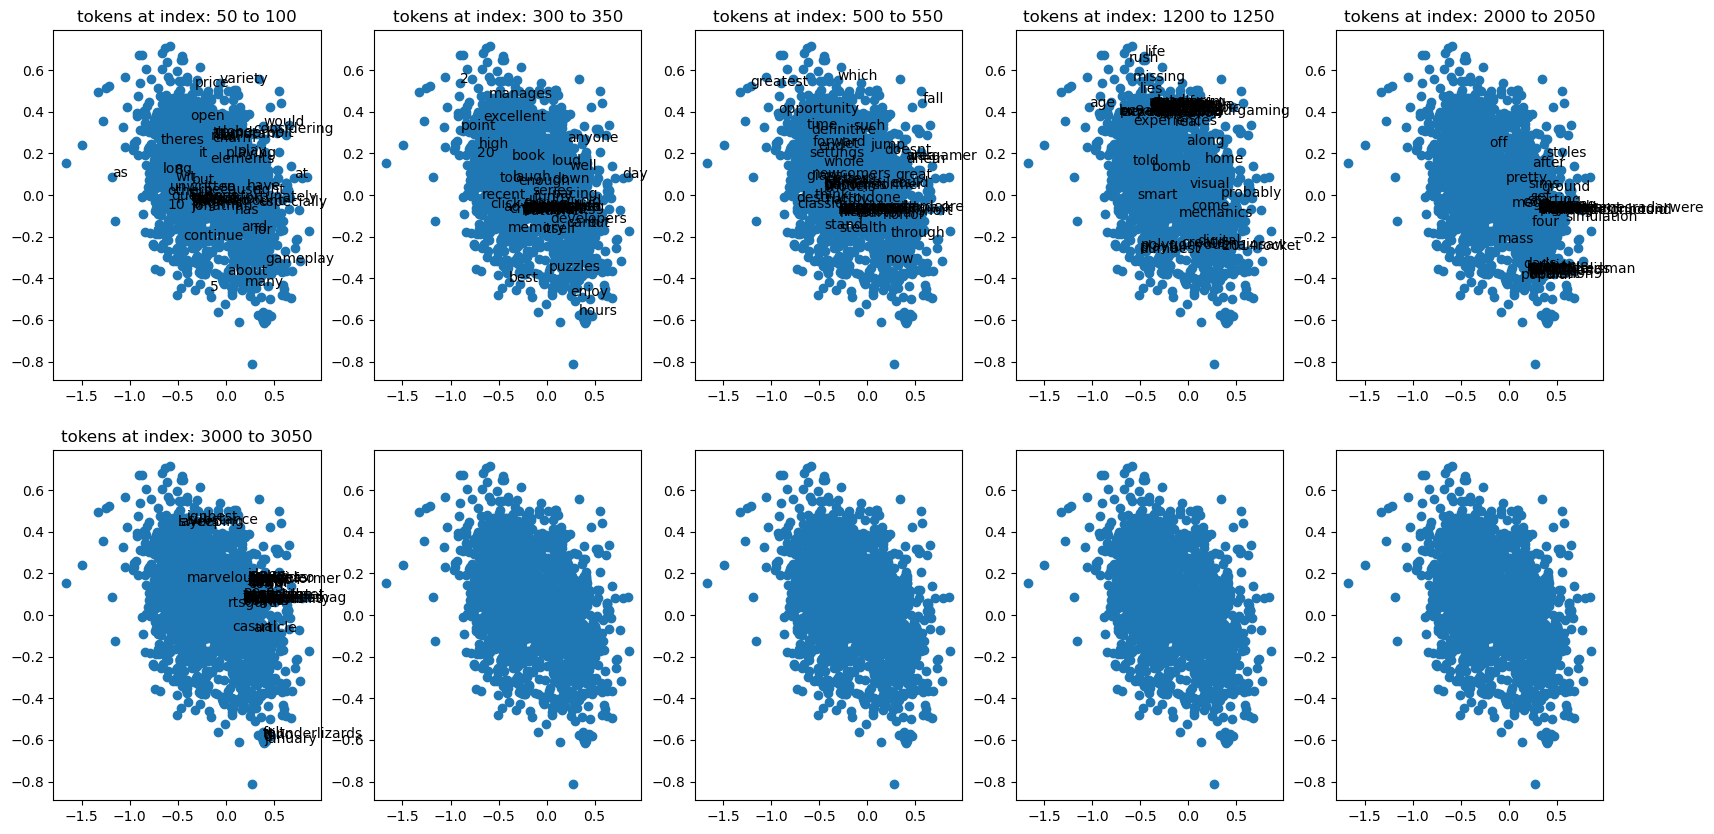

In [295]:
nrows, ncols = 2,5 
partitions_min = [50, 300,  500, 1200, 2000, 3000, 4000, 6000, 7000, 8000]
partitions_max = [100, 350, 550, 1250, 2050, 3050, 4050, 6050, 7050, 8050]
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))

for idx, ax in enumerate(axs.flatten()):
    ax.scatter(
        embeddings_trained[:,0],
        embeddings_trained[:,1]
    )
    
    for i, token in enumerate(train_vocab):
        if i >= partitions_min[idx] and i <= partitions_max[idx]:
            ax.annotate(token, (embeddings_trained[i][0:2]))
            ax.set_title('tokens at index: ' + str(partitions_min[idx]) + ' to ' + str(partitions_max[idx]))




# Evaluation

In [269]:
#print accuracy
test_results = model.evaluate(test_data)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

19/19 [==============================] - 0s 2ms/step - loss: 0.4003 - binary_accuracy: 0.7945

Test Acc. 79.45%


In [289]:
#get labels
def get_labels_from_tfdataset(tfdataset, batched=False):

    labels = list(map(lambda x: x[1], tfdataset)) # Get labels 

    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels

    return labels

y_test = get_labels_from_tfdataset(test_data, batched=False).numpy()
y_predictions = model.predict(x=test_data).flatten()
y_predictions = np.where(y_predictions>=0.50, 1, 0)


19/19 [==============================] - 0s 1ms/step


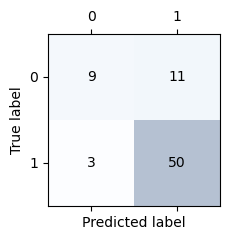

In [291]:
#confusion matrix
def confusion_matrix_plot(conf_matrix):
    """ Confusion matrix matplotlib plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()
    
conf_matrix = tf.math.confusion_matrix(
    y_test,
    y_predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
confusion_matrix_plot(conf_matrix.numpy())

In [298]:
# Show example
predictions = model.predict(test_data)

for ex in test_data.take(1):
    print('Printing encoded example:')
    print('-------------------------')
    print(ex[0].numpy()[0]) # test data is a mini-batch, keep only the first example in the first batch
    
    print('\nPrinting decoded example:')
    print('-------------------------')
    print(encoder.decode(ex[0].numpy()[0]))
    
    print('\nPrinting prediction of example:')
    print('-------------------------------')
    if predictions[0] < 0.5:
        print('Negative metacritic review with probability', predictions[0])
    else:
        print('Positive metacritic review with probability', predictions[0])
        
    print('\nPrinting ground truth of example:')
    print('-----------------------------------')
    ground_truth = ex[1].numpy()[0]
    if ground_truth == 0:
        print('Negative')
    else:
        print('Positive')

19/19 [==============================] - 0s 1ms/step
Printing encoded example:
-------------------------
[ 171   17   20  172 3606  148  175  149  754   61   71   39 1334  124
  283   89  436 1432 1112 3606  147  298  132  229  570   61 3606 3606
  314   61  315 3606  564   58   71   21 2169  436  783  657 2009  371
 1994 2933 1022  234 3606  495  100 3606   20  823 3522  268  112 1700
 3483  337 3606 3606  598  227   61   47  229 3606 3606 3606 3606  131
   20  158  571  445 3606   61 3606 3606  100   20 3606 3606   17  148
   29   41  416 2368   11   69]

Printing decoded example:
-------------------------
one of the most UNK games ive ever played and for that alone i love it pc zone 90 UNK than any game in years and UNK UNK point and click UNK done right for a change pc gamer 87 pitch perfect comedy writing they truly UNK how to UNK the genres strengths an indie masterpiece wired excellent UNK UNK cartoony design and delight in UNK UNK UNK UNK even the telltale titles are UNK and UN